<a href="https://colab.research.google.com/github/samsung-chow/324-Project/blob/main/V1_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('cleaned_data.CSV')

Accuracy: 0.8127445500279485
Confusion Matrix:
 [[774 183]
 [152 680]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       957
           1       0.79      0.82      0.80       832

    accuracy                           0.81      1789
   macro avg       0.81      0.81      0.81      1789
weighted avg       0.81      0.81      0.81      1789



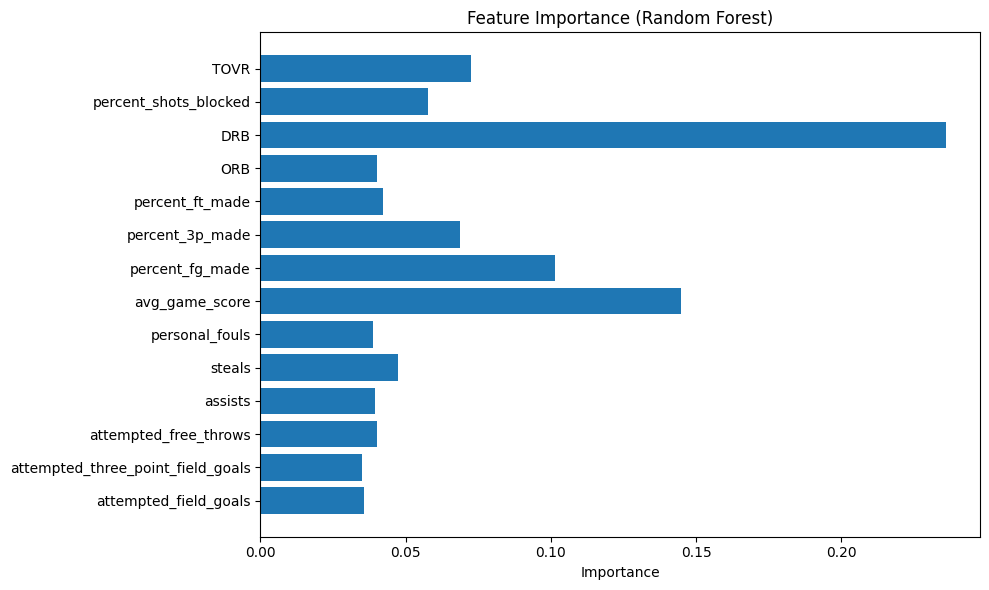

In [6]:
# Feature columns
feature_cols = [
    'attempted_field_goals',
    'attempted_three_point_field_goals',
    'attempted_free_throws',
    'assists',
    'steals',
    'personal_fouls',
    'avg_game_score',
    'percent_fg_made',
    'percent_3p_made',
    'percent_ft_made',
    'ORB',
    'DRB',
    'percent_shots_blocked',
    'TOVR'
]

X = df[feature_cols]
y = df['team_win']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_cols, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


Accuracy: 0.7909446618222471
Confusion Matrix:
 [[749 208]
 [166 666]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       957
           1       0.76      0.80      0.78       832

    accuracy                           0.79      1789
   macro avg       0.79      0.79      0.79      1789
weighted avg       0.79      0.79      0.79      1789



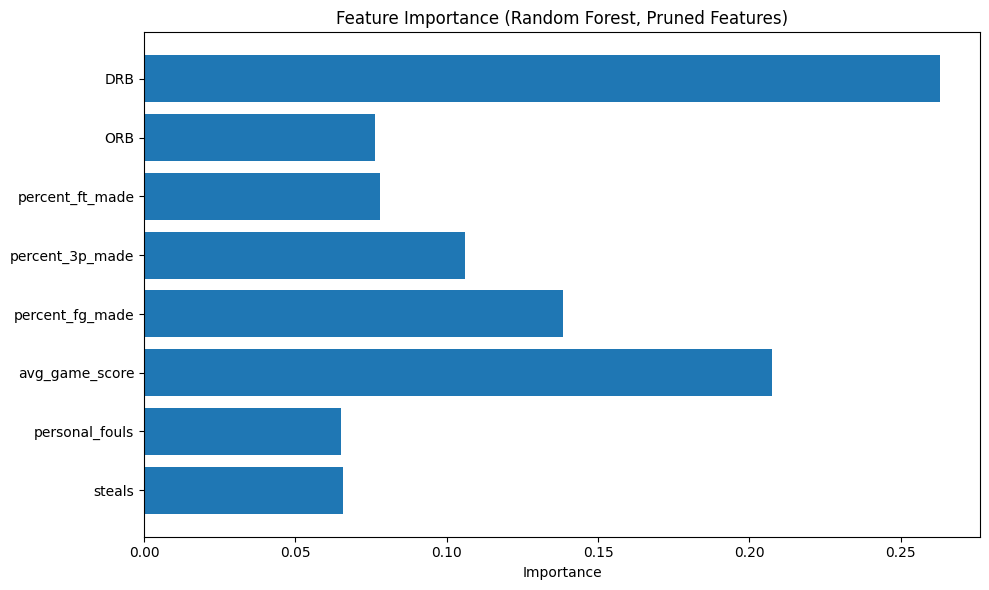

In [7]:
# Pruning features did not help
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('cleaned_data.CSV')

# Selected features based on importance
feature_cols = [
    'steals',
    'personal_fouls',
    'avg_game_score',
    'percent_fg_made',
    'percent_3p_made',
    'percent_ft_made',
    'ORB',
    'DRB'
]

X = df[feature_cols]
y = df['team_win']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance plot
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_cols, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest, Pruned Features)")
plt.tight_layout()
plt.show()
